### Annual Emmision of CO2 analysis 

-We have a datasets with four columns named Entity, Code, Year and Annual CO2 emmision


In [1]:
#Import our libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # or use import matplotlib.pyplot as plt 
import seaborn as sn

In [2]:
#we load our csv file
df = pd.read_csv('annual-co2-emissions-per-country.csv')
df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB


In [4]:
df.isnull().sum()

Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [5]:
df.nunique()

Entity                    247
Code                      217
Year                      274
Annual CO₂ emissions    21854
dtype: int64

In [6]:
# Filter for entities with no codes (NaN or empty)
entities_without_codes = df[df['Code'].isnull() | (df['Code'] == '')]

# Print the result
print(entities_without_codes['Entity'].unique())

['Africa' 'Africa (GCP)' 'Asia' 'Asia (GCP)'
 'Asia (excl. China and India)' 'Central America (GCP)' 'Europe'
 'Europe (GCP)' 'Europe (excl. EU-27)' 'Europe (excl. EU-28)'
 'European Union (27)' 'European Union (28)' 'High-income countries'
 'International aviation' 'International shipping'
 'Kuwaiti Oil Fires (GCP)' 'Low-income countries'
 'Lower-middle-income countries' 'Middle East (GCP)' 'Non-OECD (GCP)'
 'North America' 'North America (GCP)' 'North America (excl. USA)'
 'OECD (GCP)' 'Oceania' 'Oceania (GCP)' 'Ryukyu Islands (GCP)'
 'South America' 'South America (GCP)' 'Upper-middle-income countries']


In [13]:
# Define the mapping of continent entities to their codes and also assign codes(abbreviations) to countries without codes.
entity_code_mapping = {
    'Africa': 'AF',
    'Africa (GCP)': 'AFG',
    'Asia': 'AS',
    'Asia (GCP)': 'ASG',
    'Asia (excl. China and India)': 'ASE',
    'Central America (GCP)': 'CAC',
    'European Union (27)': 'EU27',
    'European Union (28)': 'EU28',
    'Europe': 'EU',
    'Europe (GCP)': 'EUG',
    'Europe (excl. EU-27)': 'EUE',
    'Europe (excl. EU-28)': 'EUX',
    'High-income countries': 'HIC',
    'International aviation': 'IVA',
    'International shipping': 'ISH',
    'Kuwaiti Oil Fires (GCP)': 'KOF',
    'Low-income countries': 'LIC',
    'Lower-middle-income countries': 'LMC',
    'Middle East (GCP)': 'MEC',
    'Non-OECD (GCP)': 'NOC',
    'North America': 'NA',
    'North America (GCP)': 'NAC',
    'North America (excl. USA)': 'NAE',
    'Oceania': 'OC',
    'Oceania (GCP)': 'OCG',
    'Ryukyu Islands (GCP)': 'RYU',
    'South America': 'SA',
    'South America (GCP)': 'SAC',
    'Upper-middle-income countries': 'UMC'
}

# Update the Code column for entities in the mapping
for entity, code in entity_code_mapping.items():
    df.loc[df['Entity'] == entity, 'Code'] = code


In [14]:
# Assuming df is your DataFrame
# Filter for entities with no codes (NaN or empty)
entities_without_codes = df[df['Code'].isnull() | (df['Code'] == '')]

# Print the result
print(entities_without_codes['Entity'].unique())

[]


In [15]:
df.nunique()

Entity                            247
Code                              246
Year                              274
Annual CO₂ emissions(tonnes)    21854
dtype: int64

In [18]:
df.isnull().sum()

Entity                          0
Code                            0
Year                            0
Annual CO₂ emissions(tonnes)    0
dtype: int64

In [19]:
#Rename the emmision column
df.rename( columns = {'Annual CO₂ emissions':'Annual CO₂ emissions(tonnes)'}, inplace =True)
df.head()

,Entity,Code,Year,Annual CO₂ emissions(tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [20]:
df['Annual CO₂ emissions(tonnes)'].describe()

count    2.913700e+04
mean     4.156982e+08
std      1.945853e+09
min      0.000000e+00
25%      3.737280e+05
50%      4.990392e+06
75%      5.327268e+07
max      3.779157e+10
Name: Annual CO₂ emissions(tonnes), dtype: float64

In [21]:
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (excl. China and India)', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Domini

### Entity Analysis

-Each value of the entity of the entity column will be classified under the following categories;

-we have continents, countries of each continent, territories, regional groupings, Income classification, global and special events.

-we will a create a new column that will tell us the where each entity falls, if it is a country, continent, territory etc.

#### Some Definitions
-Country:A country is a sovereign nation with its own government, laws, and usually recognized borders.

-Territories:A territory is not fully independent. It belongs to another country but may have some local government.

-Regional groupings:

In [22]:
#Classifying the different entities into the different categories

classification = {
    "Continents":[ "Africa","Asia","Europe", "North America", "South America","Oceania",],#"Antarctica"
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cape Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
        "Congo", "Cote d'Ivoire", "Democratic Republic of Congo", "Djibouti",
        "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
        "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan",
        "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal",
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Russia",
        "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan",
        "Tajikistan", "Thailand", "Timor-Leste","East Timor", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Czechia", "Denmark", "Estonia", "Finland", "France",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro",
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania",
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
        "Ukraine", "United Kingdom", "Vatican City"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama",
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
        "Trinidad and Tobago", "United States"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
        "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (country)",
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu"
    ],
    "Antarctica": [
        "Antarctica"
    ],
    "Regional Groupings": [
        "Africa (GCP)", "Asia (GCP)", "Asia (excl. China and India)", "Central America (GCP)",
        "Europe (GCP)", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "European Union (27)",
        "European Union (28)", "Middle East (GCP)", "North America (GCP)", 
        "North America (excl. USA)", "Oceania (GCP)", "South America (GCP)", "OECD (GCP)",
        "Non-OECD (GCP)"
    ],
    "Territories": [
        "Anguilla", "Aruba", "Bermuda", "British Virgin Islands", "bonaire sint eustatius and saba","Christmas Island",
        "Cook Islands", "Curacao", "Faroe Islands", "French Polynesia", "Greenland",
        "Hong Kong", "Macao", "Montserrat", "New Caledonia", "Niue",
        "Saint Pierre and Miquelon", "Sint Maarten (Dutch part)", "Turks and Caicos Islands",
        "Wallis and Futuna"
    ],
    "Income Classifications": [
        "High-income countries", "Low-income countries", "Lower-middle-income countries",
        "Upper-middle-income countries"
    ],
    "Global": [
        "World", "International aviation", "International shipping"
    ],
    "Special Events": [
        "Kuwaiti Oil Fires (GCP)", "Ryukyu Islands (GCP)"
    ]
}

In [23]:
#Python code to loop through and classify the entity under the new column called Regions
def classify_entity(entity):
    for region, countries in classification.items():
        if entity in countries:
            return region
    return 'Unknown'


# Apply the classification to the DataFrame
df['Region'] = df['Entity'].apply(classify_entity)

# Save the updated DataFrame to a CSV file
df.to_csv('classified_countries.csv', index=False)

# Print the updated DataFrame
df.head(100)

,Entity,Code,Year,Annual CO₂ emissions(tonnes),Region
0,Afghanistan,AFG,1949,14656.0,Asia
1,Afghanistan,AFG,1950,84272.0,Asia
2,Afghanistan,AFG,1951,91600.0,Asia
3,Afghanistan,AFG,1952,91600.0,Asia
4,Afghanistan,AFG,1953,106256.0,Asia
...,...,...,...,...,...
95,Africa,AF,1904,8910848.0,Continents
96,Africa,AF,1905,10262864.0,Continents
97,Africa,AF,1906,11717472.0,Continents
98,Africa,AF,1907,12930256.0,Continents


# Data Visualization

### 1. Global CO₂ Emissions Over Time
-Shows the total worldwide emissions trend from the earliest to the latest year.

-Reveals long-term trends, acceleration, and potential plateaus in global emissions.

   Year  Annual CO₂ emissions(tonnes)
0  1750                     9305937.0
1  1751                     9407229.0
2  1752                     9505168.0
3  1753                     9610490.0
4  1754                     9733580.0


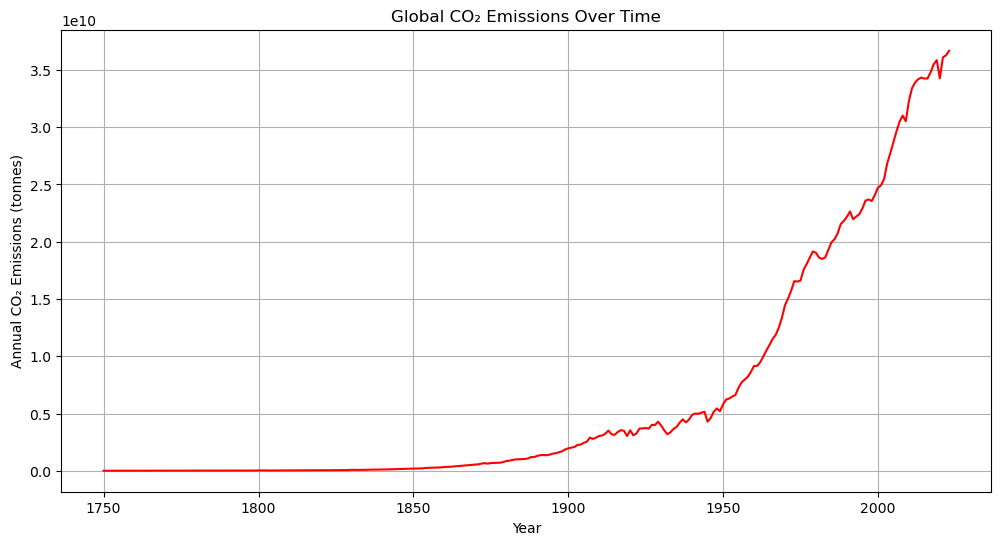

In [24]:
# Filter only total continental/global entries (optional)
global_df = df[df['Region'] == 'Continents'].groupby('Year')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(global_df.head())
plt.figure(figsize=(12, 6))
plt.plot(global_df['Year'], global_df['Annual CO₂ emissions(tonnes)'], color='red')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.grid(True)
plt.show()

### 2. CO2 emmision for Cameroon 
-we will plot a line chart of year against annual co2 emmission.


    Year  Annual CO₂ emissions(tonnes)
0   1950                      139232.0
1   1951                      183200.0
2   1952                      282128.0
3   1953                      201520.0
4   1954                      230832.0
..   ...                           ...
69  2019                     9605969.0
70  2020                     9715630.0
71  2021                     9605282.0
72  2022                    10045834.0
73  2023                     9941406.0

[74 rows x 2 columns]


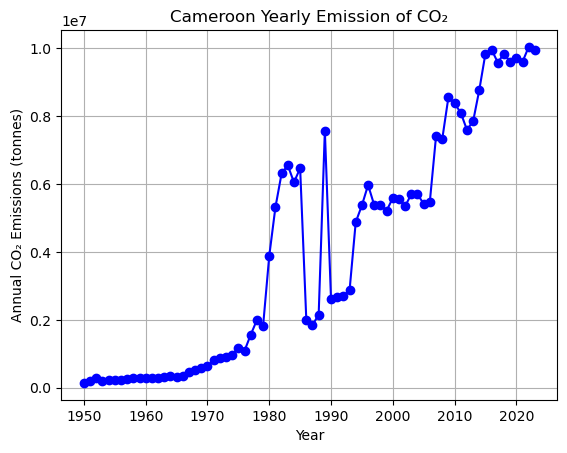

In [25]:
# Filter for Cameroon and group by Year
y = df[df['Entity'] == 'Cameroon'].groupby('Year')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
x = y['Year']  # Years for the x-axis
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis

# Create the plot
plt.plot(x, emissions, marker='o', color='blue')  # Adding markers for clarity
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.title('Cameroon Yearly Emission of CO₂')
plt.grid(True)
plt.show()

### 3. CO2 emmision for all countries in Africa

                          Entity  Annual CO₂ emissions(tonnes)
0                        Algeria                  5.263690e+09
1                         Angola                  7.153404e+08
2                          Benin                  1.216886e+08
3                       Botswana                  1.734650e+08
4                   Burkina Faso                  8.871584e+07
5                        Burundi                  1.541374e+07
6                       Cameroon                  2.999828e+08
7                     Cape Verde                  1.618478e+07
8       Central African Republic                  1.211561e+07
9                           Chad                  4.892444e+07
10                       Comoros                  6.798687e+06
11                         Congo                  1.810487e+08
12                 Cote d'Ivoire                  3.835648e+08
13  Democratic Republic of Congo                  2.302409e+08
14                      Djibouti                  2.042

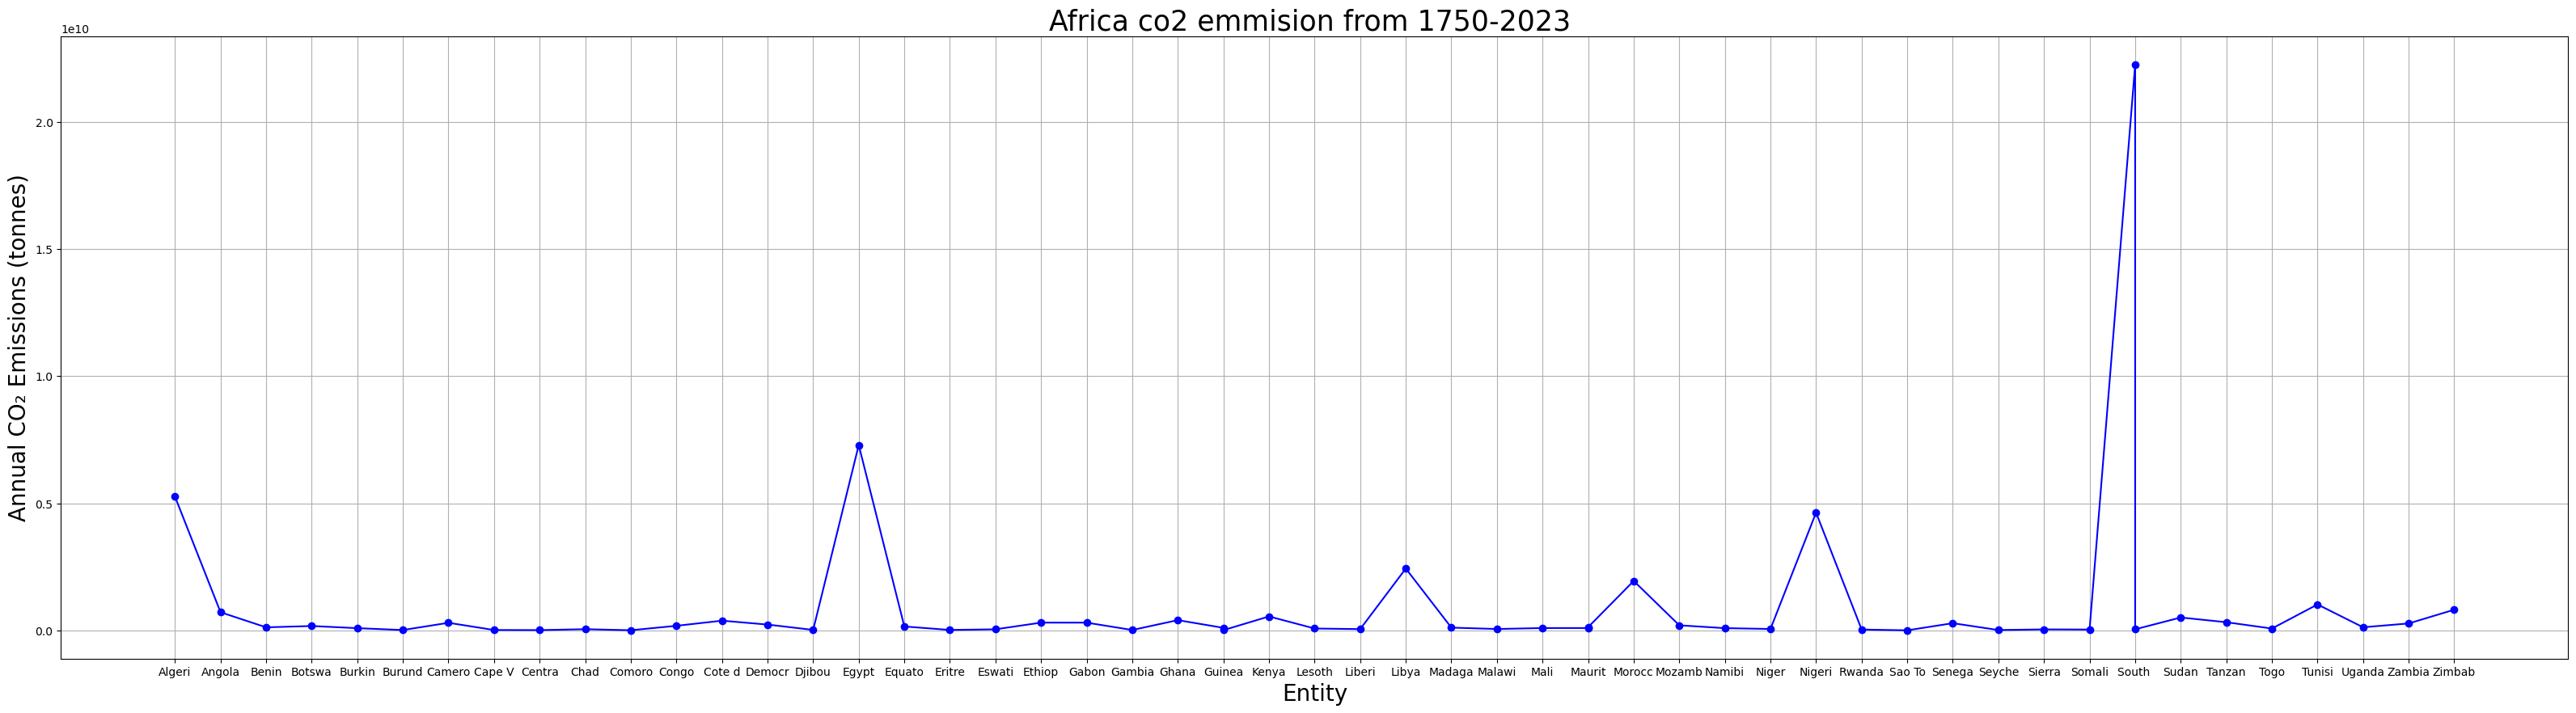

In [26]:
# Filter for Cameroon and group by Year
y = df[df['Region'] == 'Africa'].groupby('Entity')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
#x = y['Code']  
x = y['Entity'].str.slice(0, 6)  
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis
#create figure
plt.figure(figsize=(40, 10))

# Create the plot
plt.plot(x, emissions, marker='o', color='blue')  # Adding markers for clarity
plt.xlabel('Entity',fontsize=20)
plt.ylabel('Annual CO₂ Emissions (tonnes)',fontsize=20)
plt.title('Africa co2 emmision from 1750-2023 ',fontsize=25)

plt.grid(True)
plt.show()

### We will Redo the analysis above but our focus will be on the year 2023
-Our analysis shows that South Africa emitted the highest amount of CO2 followed by Egpyth and then algeria.

-We cam thesame for other continents by just changing the region value to the continents we want to analyse.


                          Entity  Annual CO₂ emissions(tonnes)
0                        Algeria                   178132770.0
1                         Angola                    20780540.0
2                          Benin                     5592317.0
3                       Botswana                     6713559.0
4                   Burkina Faso                     6186583.0
5                        Burundi                      709700.0
6                       Cameroon                     9941406.0
7                     Cape Verde                      534969.0
8       Central African Republic                      281213.0
9                           Chad                     3079389.0
10                       Comoros                      448731.0
11                         Congo                     7674340.0
12                 Cote d'Ivoire                    13195601.0
13  Democratic Republic of Congo                     4615953.0
14                      Djibouti                      4

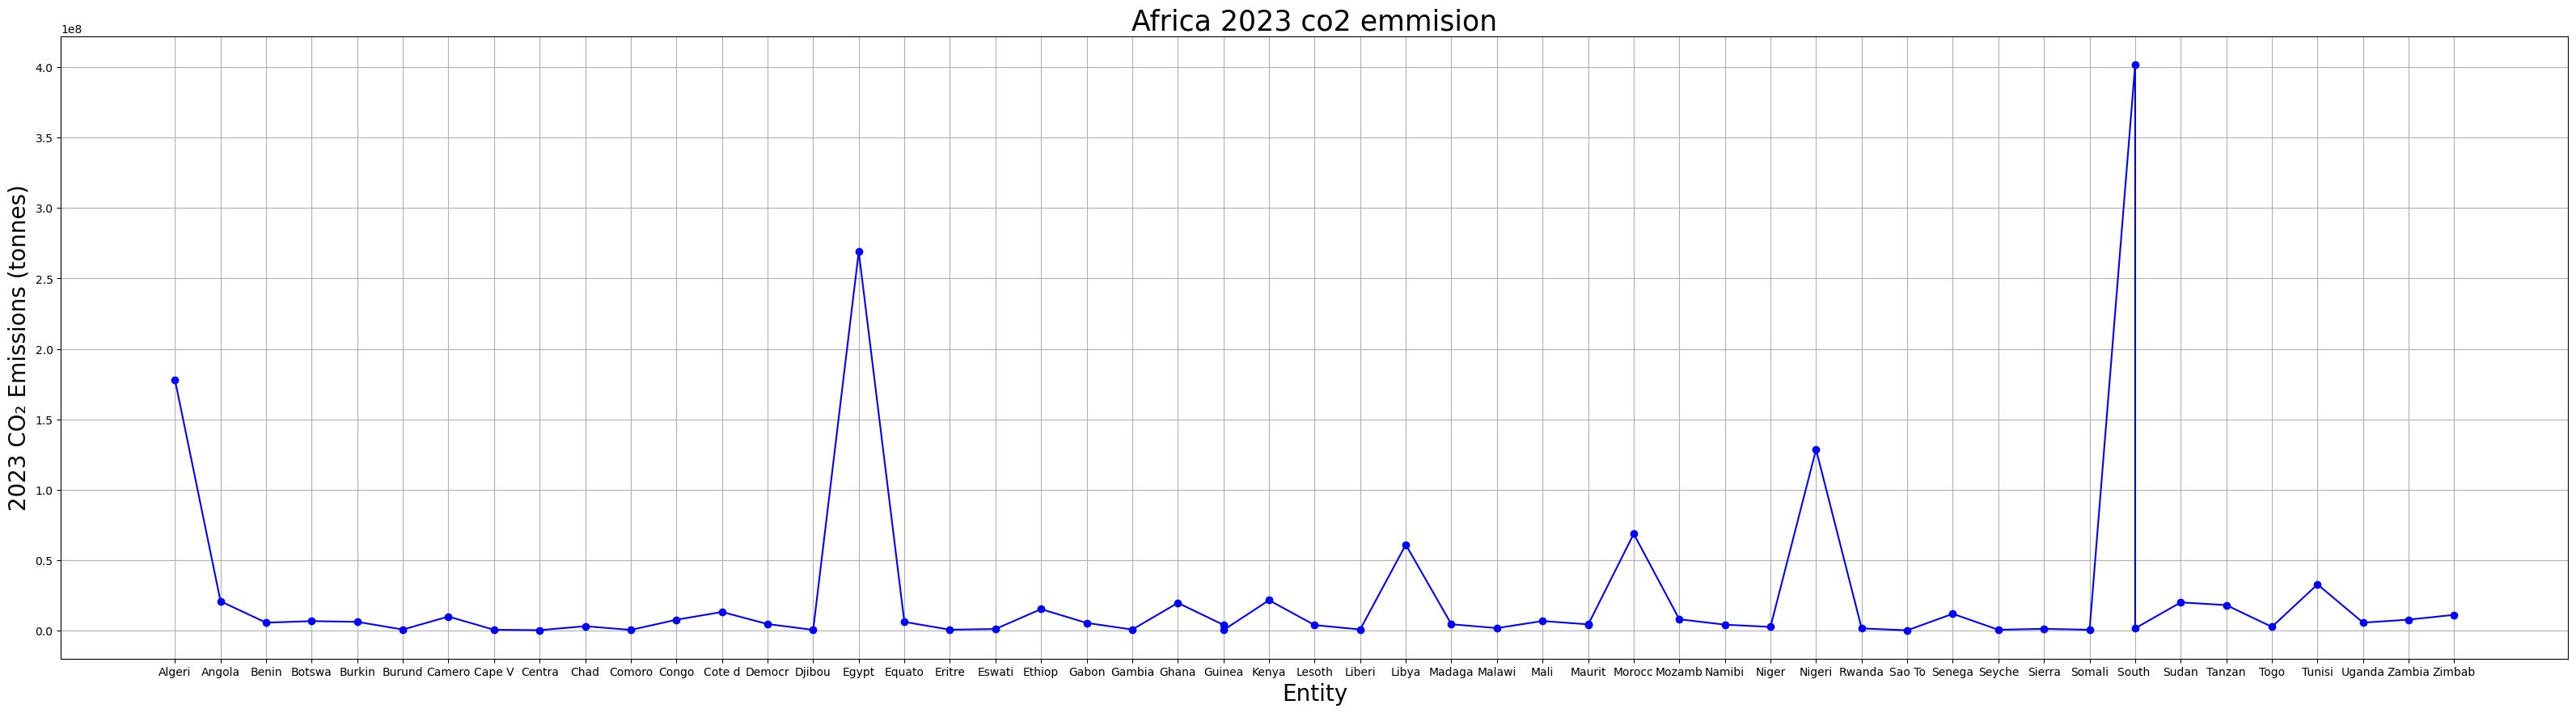

In [27]:
# Filter for Cameroon and group by Year
y = df[(df['Year'] == 2023) & (df['Region'] == 'Africa')].groupby('Entity')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
x = y['Entity'].str.slice(0, 6)   
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis
#create figure
plt.figure(figsize=(40, 10))

# Create the plot
plt.plot(x, emissions, marker='o', color='blue',)  # Adding markers for clarity
plt.xlabel('Entity', fontsize=20)
plt.ylabel('2023 CO₂ Emissions (tonnes)', fontsize=20)
plt.title('Africa 2023 co2 emmision',  fontsize=25)

plt.grid(True)
plt.show()

### 4. Emmission by continents
-We will see which continents emits the highest Co2 

          Region  Annual CO₂ emissions(tonnes)
0         Africa                  1.418728e+09
1     Antarctica                  0.000000e+00
2           Asia                  2.438839e+10
3         Europe                  3.169325e+09
4  North America                  6.117954e+09
5        Oceania                  4.242077e+08
6  South America                  1.108965e+09


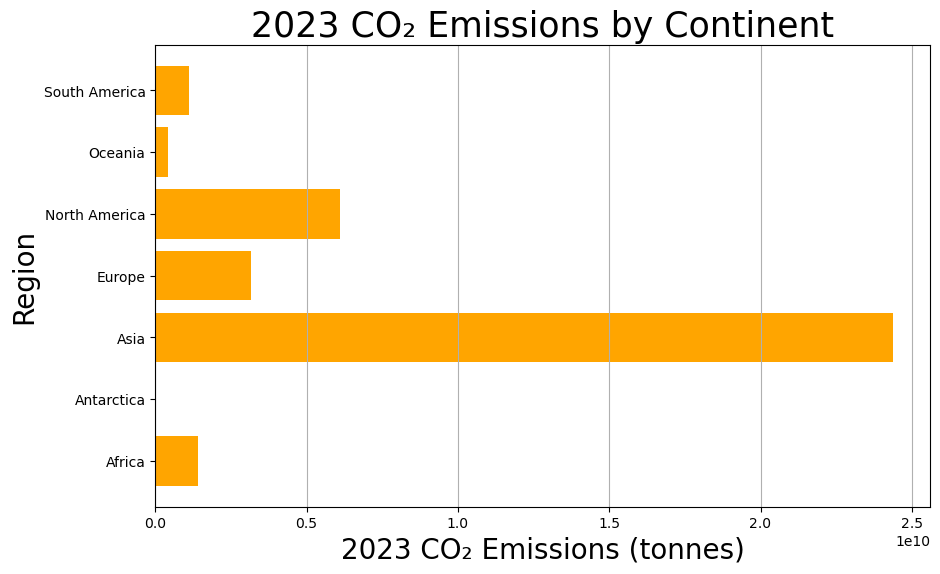

In [28]:
# Filter the continents and group by Region
y = df[(df['Year'] == 2023) & (df['Region'].isin(['Africa', 'Asia',"Europe", "North America", "South America","Oceania","Antarctica"]))].groupby('Region')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
#Extract x and y for plotting
regions = y['Region']  # Regions for the y-axis
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the x-axis

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(regions, emissions, color='orange')  # Horizontal bar chart
plt.xlabel('2023 CO₂ Emissions (tonnes)', fontsize=20)  # x-axis label
plt.ylabel('Region', fontsize=20)  # y-axis label
plt.title('2023 CO₂ Emissions by Continent', fontsize=25)  # Title

plt.grid(axis='x')  # Add grid lines for better readability
plt.show()

### 5. Emissions by Region (2023)
-Pie chart showing the proportion of emissions by region in the latest year.

-Highlights which regions are responsible for the majority of emissions.

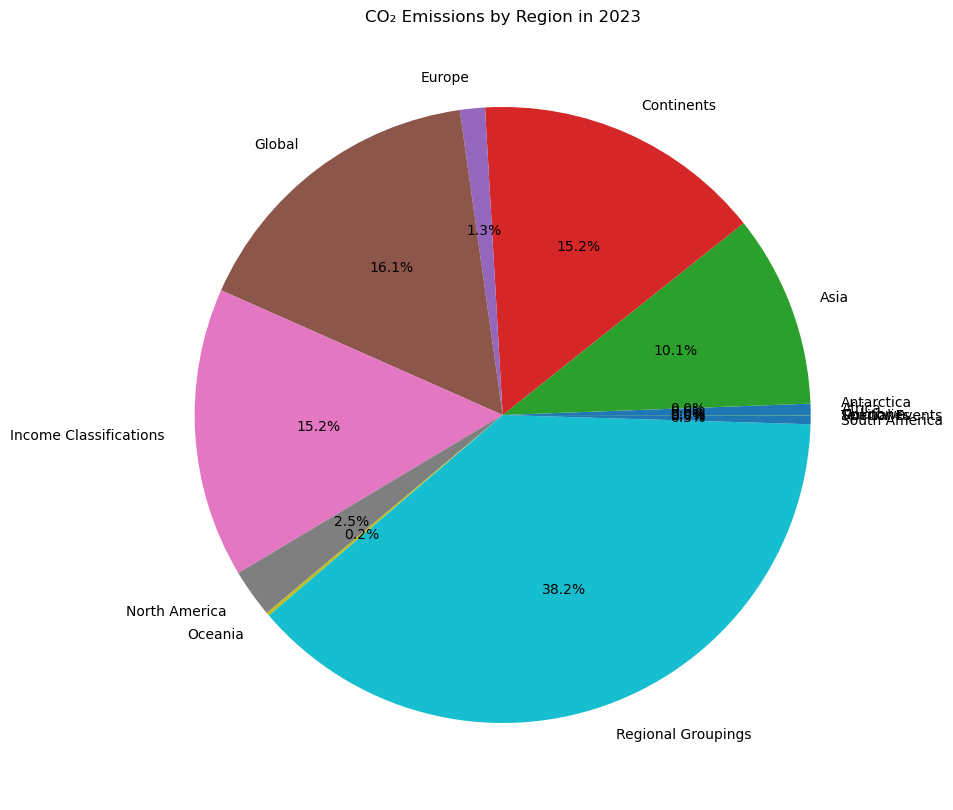

In [29]:
latest_year = df['Year'].max()
latest_data = df[df['Year'] == latest_year]
region_emissions = latest_data.groupby('Region')['Annual CO₂ emissions(tonnes)'].sum()

plt.figure(figsize=(10, 10))
plt.pie(region_emissions, labels=region_emissions.index, autopct='%1.1f%%')
plt.title(f'CO₂ Emissions by Region in {latest_year}')
plt.show()